In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
!unzip /content/drive/My\ Drive/Seismology.zip

Archive:  /content/drive/My Drive/Seismology.zip
replace Seismology/CNN.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Seismology/image_loader.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train_loader: 301
Noise Noise Seismic Seismic
[1,   100] loss: 11.496
[1,   200] loss: 10.479
[1,   300] loss: 9.967
[2,   100] loss: 8.828
[2,   200] loss: 8.261
[2,   300] loss: 7.185
[3,   100] loss: 6.408
[3,   200] loss: 5.599
[3,   300] loss: 5.324
[4,   100] loss: 4.835
[4,   200] loss: 4.103
[4,   300] loss: 3.885
[5,   100] loss: 3.516
[5,   200] loss: 3.341
[5,   300] loss: 3.075
[6,   100] loss: 2.992
[6,   200] loss: 2.313
[6,   300] loss: 2.774
[7,   100] loss: 2.746
[7,   200] loss: 2.549
[7,   300] loss: 2.221
[8,   100] loss: 1.996
[8,   200] loss: 1.765
[8,   300] loss: 2.152
[9,   100] loss: 2.289
[9,   200] loss: 1.853
[9,   300] loss: 1.495
[10,   100] loss: 1.407
[10,   200] loss: 1.785
[10,   300] loss: 1.593
[11,   100] loss: 1.673
[11,   200] loss: 1.337
[11,   300] loss: 1.220
[12,   100] loss: 1.388
[12,   200] loss: 1.162
[12,   300] loss: 1.109
[13,   100] loss: 1.088
[13,   200] loss: 1.464
[13,   300] loss: 1.299
[14,   100] loss: 1.393
[14,   200] loss: 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  Seismic Seismic Seismic Seismic
Predicted:  Seismic Noise Noise Seismic
Accuracy of the network on the test images: 52 %
Accuracy of Seismic : 45 %
Accuracy of Noise : 56 %


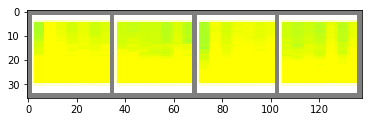

In [0]:
from __future__ import print_function, division
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, Sampler
from torchvision import utils
from torchvision import datasets
from torchvision.transforms import transforms
from torch.optim import Adam
from torch.optim import lr_scheduler
from torchvision import models, transforms
import time
import os
import copy
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

num_epochs = 100
num_classes = 2
batch_size = 10
learning_rate = 0.001
num_of_workers = 0

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train_loader: 301
Noise Seismic Seismic Seismic


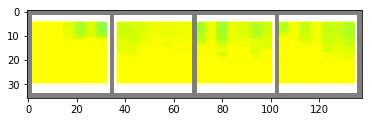

In [0]:
DATA_PATH_TRAIN = '/content/Seismology/Train/Spectrogram'
DATA_PATH_TEST = '/content/Seismology/Test'
MODEL_STORE_PATH = '/content/Seismology'

trans = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

# Seismology dataset
train_dataset = datasets.ImageFolder(root=DATA_PATH_TRAIN, transform=trans)
test_dataset = datasets.ImageFolder(root=DATA_PATH_TEST, transform=trans)

# Create custom random sampler class to iter over dataloader.
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_of_workers)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_of_workers)

classes = ('Seismic', 'Noise')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    # plt.imshow((npimg* 255).astype(np.uint8))

print('Train_loader:', len(train_loader))

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [0]:
net1 = models.resnet18(pretrained=True)
num_ftrs = net1.fc.in_features
net1.fc1 = nn.Linear(num_ftrs,2)
net1 = net1.to(device)

net2 = models.resnet18(pretrained=True)
num_ftrs = net2.fc.in_features
net2.fc1 = nn.Linear(num_ftrs,2)
net2 = net2.to(device)


criterion = nn.CrossEntropyLoss()
criterion = criterion.cuda()
optimizer = optim.SGD(net.parameters(), lr=0.00001, momentum=0.9, weight_decay=0.01)

In [0]:
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        inputs = data[0].to(device)
        labels = data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print('a')
        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

images = images.to(device)
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(batch_size)))

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(2):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))